# Biot Savard Law using Plotly

In [1]:
import plotly
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from plotly.offline import plot

from IPython.core.display import display,HTML
import sympy as smp
from sympy.vector import cross

In [2]:
phi = np.linspace(0, 2*np.pi, 100)

def l(phi):
    return (1+3/4 * np.sin(3*phi)) * np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))])

In [3]:
lx, ly, lz = l(phi)

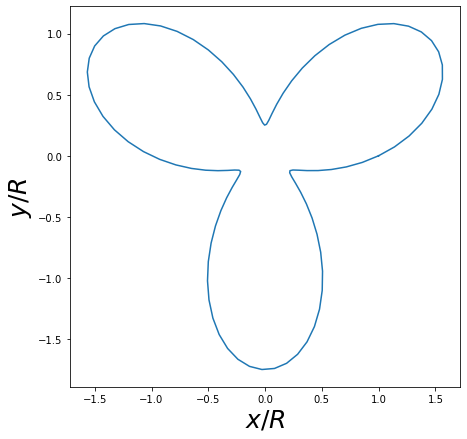

In [4]:
plt.figure(figsize=(7,7))
plt.plot(lx,ly)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$y/R$', fontsize=25)
plt.show()

 solve integrand using sympy

In [5]:
t, x, y, z = smp.symbols('t, x, y, z') 

In [6]:
l = (1+(3/4)*smp.sin(3*t))*smp.Matrix([smp.cos(t), smp.sin(t), 0])
r = smp.Matrix([x,y,z])
sep=r-l

In [7]:
l

Matrix([
[(0.75*sin(3*t) + 1)*cos(t)],
[(0.75*sin(3*t) + 1)*sin(t)],
[                         0]])

In [8]:
r

Matrix([
[x],
[y],
[z]])

In [9]:
sep

Matrix([
[x - (0.75*sin(3*t) + 1)*cos(t)],
[y - (0.75*sin(3*t) + 1)*sin(t)],
[                             z]])

Define integrand

In [10]:
integrand = smp.diff(l,t).cross(sep) / sep.norm()**3

Get x, y z components of the integrand

In [11]:
integrand

Matrix([
[                                                                                                                          z*((0.75*sin(3*t) + 1)*cos(t) + 2.25*sin(t)*cos(3*t))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)],
[                                                                                                                        -z*(-(0.75*sin(3*t) + 1)*sin(t) + 2.25*cos(t)*cos(3*t))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)],
[(-(x - (0.75*sin(3*t) + 1)*cos(t))*((0.75*sin(3*t) + 1)*cos(t) + 2.25*sin(t)*cos(3*t)) + (y - (0.75*sin(3*t) + 1)*sin(t))*(-(0.75*sin(3*t) + 1)*sin(t) + 2.25*cos(t)*cos(3*t)))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)]])

In [12]:
dBxdt = smp.lambdify([t,x,y,z], integrand[0])
dBydt = smp.lambdify([t,x,y,z], integrand[1])
dBzdt = smp.lambdify([t,x,y,z], integrand[2])

In [13]:
dBxdt(np.pi, 1, 1, 1)

-0.0680413817439772

In [14]:
quad(dBxdt, 0, 2*np.pi, args=(1,1,1)) # gives value and error

(0.367215052854198, 6.916483780662426e-09)

Get the magnetic field by performing the integral over each component

In [15]:
def B(x,y,z):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x,y,z))[0],
                     quad(dBydt, 0, 2*np.pi, args=(x,y,z))[0],
                     quad(dBzdt, 0, 2*np.pi, args=(x,y,z))[0]])

In [16]:
B(0.5,0.5,0)

array([ 0.        ,  0.        , 10.87779227])

In [17]:
B(0.5,0.5,1)

array([0.19069963, 0.52786431, 1.52524645])

Set up a meshgrid to solve for the field in some 3D volume

In [18]:
x = np.linspace(-2,2,20)

xv,yv,zv = np.meshgrid(x,x,x)

In [19]:
B_field = np.vectorize(B, signature='(),(),()->(n)')(xv,yv,zv)
Bx = B_field[:,:,:,0]
By = B_field[:,:,:,1]
Bz = B_field[:,:,:,2]

use plotly for 3D intractive plot

In [20]:
xv.ravel()

array([-2., -2., -2., ...,  2.,  2.,  2.])

In [22]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Biot Savard Law ',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
   
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))